In [1]:
import os
import numpy as np
import pandas as pd
import math
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
dataset_df = pd.read_json("./data/all_ads_small.json")
dataset_df = dataset_df.drop(["id", "category"], axis=1)
dataset_df.head(5)

,fuel_cb,gearbox_cb,locality,manufacturer_cb,model_cb,price,tachometer,vehicle_age
0,Nafta,Automatická,Středočeský kraj,BMW,Řada 3,1349000,26000,1
1,Nafta,Manuální,Hlavní město Praha,BMW,Řada 3,455000,193107,5
2,Nafta,None,Jihočeský kraj,BMW,Řada 3,1510000,12000,1
3,Nafta,Automatická,Královéhradecký kraj,BMW,Řada 3,1228149,25400,1
4,Hybridní,Automatická,Moravskoslezský kraj,BMW,Řada 3,1703000,24000,1


In [3]:
train_numerical = dataset_df.select_dtypes(exclude=["object"])
train_numerical.fillna(0, inplace=True)
train_categoric = dataset_df.select_dtypes(include=["object"])
train_categoric.fillna("null", inplace=True)
train = train_numerical.merge(train_categoric, left_index=True, right_index=True)

train.vehicle_age.where(train.vehicle_age > 0, 0, inplace=True)

In [4]:
train.head()

,price,tachometer,vehicle_age,fuel_cb,gearbox_cb,locality,manufacturer_cb,model_cb
0,1349000,26000,1,Nafta,Automatická,Středočeský kraj,BMW,Řada 3
1,455000,193107,5,Nafta,Manuální,Hlavní město Praha,BMW,Řada 3
2,1510000,12000,1,Nafta,null,Jihočeský kraj,BMW,Řada 3
3,1228149,25400,1,Nafta,Automatická,Královéhradecký kraj,BMW,Řada 3
4,1703000,24000,1,Hybridní,Automatická,Moravskoslezský kraj,BMW,Řada 3


In [5]:
normalizer_tachometer = layers.Normalization(axis=None)
normalizer_tachometer.adapt(train.tachometer)
print("normalizer_tachometer:", normalizer_tachometer(train.tachometer))

normalizer_vehicle_age = layers.Normalization()
normalizer_vehicle_age.adapt(train.vehicle_age)
print("normalizer_vehicle_age:", normalizer_vehicle_age(train.vehicle_age))

normalizer_price = layers.Normalization()
normalizer_price.adapt(train.price)
print("normalizer_price:", normalizer_vehicle_age(train.price))

lookup_locality = tf.keras.layers.StringLookup(output_mode='one_hot')
lookup_locality.adapt(train.locality)
print("lookup_locality:", lookup_locality(train.locality))

lookup_gearbox_cb = tf.keras.layers.StringLookup(output_mode='one_hot')
lookup_gearbox_cb.adapt(train.gearbox_cb)
print("lookup_gearbox_cb:", lookup_gearbox_cb(train.gearbox_cb))

lookup_manufacturer_cb = tf.keras.layers.StringLookup(output_mode='one_hot')
lookup_manufacturer_cb.adapt(train.manufacturer_cb)
print("lookup_manufacturer_cb:", lookup_manufacturer_cb(train.manufacturer_cb))

lookup_model_cb = tf.keras.layers.StringLookup(output_mode='one_hot')
lookup_model_cb.adapt(train.model_cb)
print("lookup_model_cb:", lookup_model_cb(train.model_cb))

lookup_fuel_cb = tf.keras.layers.StringLookup(output_mode='one_hot')
lookup_fuel_cb.adapt(train.fuel_cb)
print("lookup_fuel_cb:", lookup_fuel_cb(train.fuel_cb))

Metal device set to: Apple M1


2022-09-28 22:50:07.471947: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-28 22:50:07.472039: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-09-28 22:50:07.505686: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-28 22:50:07.552497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-09-28 22:50:07.564320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


normalizer_tachometer: tf.Tensor(
[[-0.9161121   0.97448003 -1.0745034  ...  1.1226097   0.17140234
  -0.06758747]], shape=(1, 7895), dtype=float32)


2022-09-28 22:50:08.091317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-09-28 22:50:08.103109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


normalizer_vehicle_age: tf.Tensor(
[[-0.9456208  -0.3371589  -0.9456208  ...  0.27130297 -0.03292796
  -0.18504342]], shape=(1, 7895), dtype=float32)


2022-09-28 22:50:08.620241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-09-28 22:50:08.632022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


normalizer_price: tf.Tensor([[205202.66  69211.44 229693.25 ...  91268.03 156662.62 136750.7 ]], shape=(1, 7895), dtype=float32)


2022-09-28 22:50:09.129410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


lookup_locality: tf.Tensor(
[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(7895, 15), dtype=float32)
lookup_gearbox_cb: tf.Tensor(
[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]], shape=(7895, 5), dtype=float32)


2022-09-28 22:50:09.334536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-09-28 22:50:09.523662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


lookup_manufacturer_cb: tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(7895, 52), dtype=float32)
lookup_model_cb: tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(7895, 145), dtype=float32)


2022-09-28 22:50:09.709199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-09-28 22:50:09.895786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


lookup_fuel_cb: tf.Tensor(
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]], shape=(7895, 8), dtype=float32)


In [26]:
inputs = {
    "tachometer": tf.keras.Input(shape=(), dtype='float64'),
    "vehicle_age": tf.keras.Input(shape=(), dtype='float64'),
    "fuel_cb": tf.keras.Input(shape=(), dtype='string'),
    "gearbox_cb": tf.keras.Input(shape=(), dtype='string'),
    "locality": tf.keras.Input(shape=(), dtype='string'),
    "manufacturer_cb": tf.keras.Input(shape=(), dtype='string'),
    "model_cb": tf.keras.Input(shape=(), dtype='string'),
}

# tachometer_output = normalizer_tachometer(inputs["tachometer"])
tachometer_output = tf.cast(tf.expand_dims(inputs["tachometer"], 0), tf.float32)

vehicle_age_output = tf.cast(tf.expand_dims(inputs["vehicle_age"], 0), tf.float32)
fuel_cb_output = lookup_fuel_cb(inputs["fuel_cb"])
gearbox_cb_output = lookup_gearbox_cb(inputs["gearbox_cb"])
locality_output = lookup_locality(inputs["locality"])
manufacturer_cb_output = lookup_manufacturer_cb(inputs["manufacturer_cb"])
model_cb_output = lookup_model_cb(inputs["model_cb"])

outputs = {
    "tachometer": tachometer_output,
    "vehicle_age": vehicle_age_output,
    "fuel_cb": fuel_cb_output,
    "gearbox_cb": gearbox_cb_output,
    "locality": locality_output,
    "manufacturer_cb": manufacturer_cb_output,
    "model_cb": model_cb_output,
}
preprocessing_model = tf.keras.Model(inputs, outputs)

In [27]:
# tf.keras.utils.plot_model(preprocessing_model, show_shapes=True,
#     show_dtype=True,
#     show_layer_names=True,
#     expand_nested=True,
#     show_layer_activations=True)

In [67]:
dataset = tf.data.Dataset.from_tensor_slices((train.drop(['price'], axis=1).tail(-100).to_dict(orient="list"), list(train.price.tail(-100)))).batch(1)
dataset = dataset.map(lambda x, y: (preprocessing_model(x), y),
                      num_parallel_calls=tf.data.AUTOTUNE)

# Display a preprocessed input sample.
# print(next(dataset.take(1).as_numpy_iterator()))

In [68]:
inputs = {
    "tachometer": tf.keras.Input(shape=(1, ), dtype='float32'),
    "vehicle_age": tf.keras.Input(shape=(1, ), dtype='float32'),
    "fuel_cb": tf.keras.Input(shape=(len(lookup_fuel_cb.get_vocabulary()),), dtype='float32'),
    "gearbox_cb": tf.keras.Input(shape=(len(lookup_gearbox_cb.get_vocabulary()),), dtype='float32'),
    "locality": tf.keras.Input(shape=(len(lookup_locality.get_vocabulary()),), dtype='float32'),
    "manufacturer_cb": tf.keras.Input(shape=(len(lookup_manufacturer_cb.get_vocabulary()),), dtype='float32'),
    "model_cb": tf.keras.Input(shape=(len(lookup_model_cb.get_vocabulary()),), dtype='float32'),
}

outputs = tf.keras.layers.Concatenate()([
    inputs["tachometer"],
    inputs["vehicle_age"],
    inputs["fuel_cb"],
    inputs["gearbox_cb"],
    inputs["locality"],
    inputs["manufacturer_cb"],
    inputs["model_cb"],
])

outputs = tf.keras.layers.Dense(100)(outputs)
outputs = tf.keras.layers.Dense(1)(outputs)

training_model = tf.keras.Model(inputs, outputs)

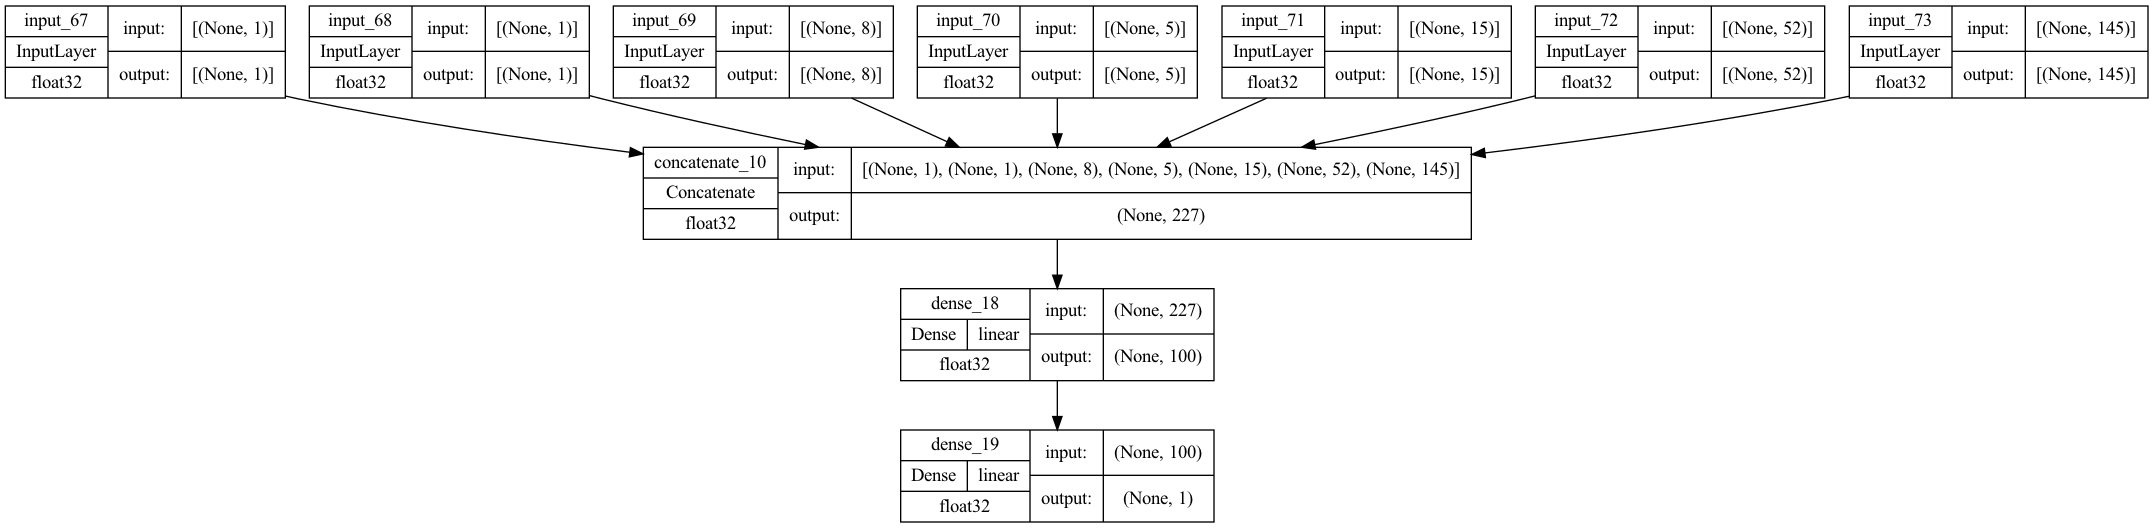

In [69]:
tf.keras.utils.plot_model(training_model, show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    expand_nested=True,
    show_layer_activations=True)

In [74]:
training_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True))
training_model.fit(dataset)

2022-09-28 23:27:04.076359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7795/7795 [==============================] - 42s 5ms/step - loss: 0.0000e+00


In [75]:
inputs = preprocessing_model.input
outputs = training_model(preprocessing_model(inputs))
inference_model = tf.keras.Model(inputs, outputs)

inputs_to_predict = train.drop(['price'], axis=1).head(100).to_dict(orient="list")
predict_dataset = tf.data.Dataset.from_tensor_slices(inputs_to_predict).batch(1)
predictions = inference_model.predict(predict_dataset)

 50/100 [==============>...............] - ETA: 0s

2022-09-28 23:27:46.132654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 0s 3ms/step


In [76]:
pd.options.display.float_format = '{:.0f}'.format

df_results = pd.DataFrame({"predicted": predictions.flatten(), "real": train.price.head(100)})
df_results.head()

,predicted,real
0,381039232,1349000
1,2829766656,455000
2,175882800,1510000
3,372244608,1228149
4,351722176,1703000


In [77]:
df_results.describe()

,predicted,real
count,100,100
mean,2157953280,585128
std,1475244288,568170
min,44562,32000
25%,677242864,126725
50%,2188962432,344000
75%,3326569152,1174250
max,6290655744,1858000
